<a href="https://colab.research.google.com/github/ayushch05/Polygence/blob/main/AmazonReview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

# New Section

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
import warnings
!pip install kmodes
from kmodes.kmodes import KModes
warnings.filterwarnings(action='ignore')
from kmodes.kprototypes import KPrototypes


amazonData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Amazon Customer Behavior Survey.csv")
amazonData.head()


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [ ]:
amazonData = amazonData.dropna()
label_encoder = LabelEncoder()
for column in amazonData.columns:
    if amazonData[column].dtype == 'object':  # Check if the column contains categorical data
        amazonData[column] = label_encoder.fit_transform(amazonData[column])


Service Appreciation

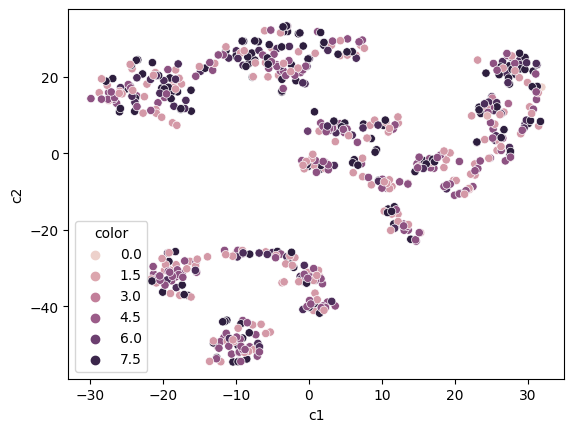

In [ ]:
x_cols = ['age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ','Shopping_Satisfaction',
       'Improvement_Areas']

y_cols = 'Service_Appreciation'
X = amazonData[x_cols]
Y = amazonData[y_cols]
tsne = TSNE(n_components = 2, random_state = 0, perplexity = 20)
tsne_out = tsne.fit_transform(X)
tsne_out = pd.DataFrame(tsne_out)
tsne_out.columns = ["c1","c2"]
tsne_out["color"] = Y

#Color clustering
sns.scatterplot(tsne_out,x = "c1", y = "c2", hue = "color")
plt.show()


Shopping Satisfaction

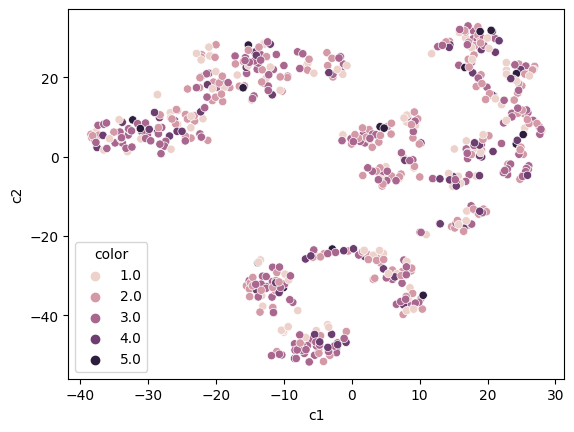

In [ ]:
x_cols = ['age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness',
       'Rating_Accuracy ','Service_Appreciation',
       'Improvement_Areas']

y_cols = 'Shopping_Satisfaction'
X = amazonData[x_cols]
Y = amazonData[y_cols]
tsne = TSNE(n_components = 2, random_state = 0, perplexity = 20)
tsne_out = tsne.fit_transform(X)
tsne_out = pd.DataFrame(tsne_out)
tsne_out.columns = ["c1","c2"]
tsne_out["color"] = Y

#Color clustering
sns.scatterplot(tsne_out,x = "c1", y = "c2", hue = "color")
plt.show()

Rating Accuracy

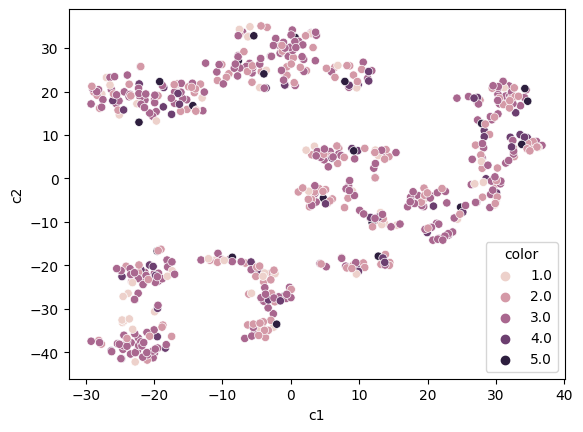

In [ ]:
x_cols = ['age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness', 'Shopping_Satisfaction',
        'Recommendation_Helpfulness','Service_Appreciation',
       'Improvement_Areas']

y_cols = 'Rating_Accuracy '
X = amazonData[x_cols]
Y = amazonData[y_cols]
tsne = TSNE(n_components = 2, random_state = 0, perplexity = 20)
tsne_out = tsne.fit_transform(X)
tsne_out = pd.DataFrame(tsne_out)
tsne_out.columns = ["c1","c2"]
tsne_out["color"] = Y

#Color clustering
sns.scatterplot(tsne_out,x = "c1", y = "c2", hue = "color")
plt.show()

Improvement Areas

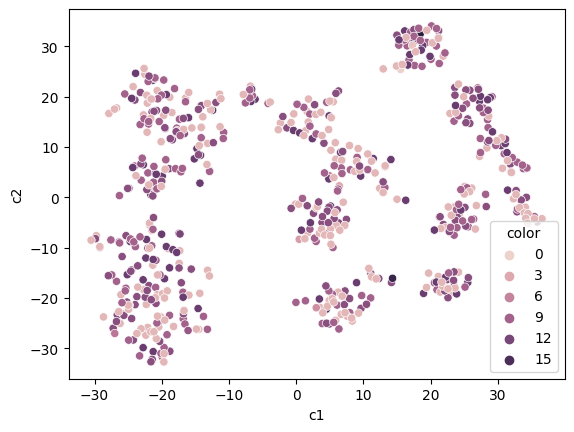

In [ ]:
x_cols = ['age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness', 'Shopping_Satisfaction', 'Rating_Accuracy ',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness','Service_Appreciation',]

y_cols = 'Improvement_Areas'
X = amazonData[x_cols]
Y = amazonData[y_cols]
tsne = TSNE(n_components = 2, random_state = 0, perplexity = 20)
tsne_out = tsne.fit_transform(X)
tsne_out = pd.DataFrame(tsne_out)
tsne_out.columns = ["c1","c2"]
tsne_out["color"] = Y

#Color clustering
sns.scatterplot(tsne_out,x = "c1", y = "c2", hue = "color")
plt.show()

Purchase Frequency

In [ ]:
x_cols = ['age', 'Gender', 'Purchase_Categories',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Improvement_Areas',
       'Review_Reliability', 'Review_Helpfulness', 'Shopping_Satisfaction', 'Rating_Accuracy ',
       'Personalized_Recommendation_Frequency ', 'Recommendation_Helpfulness','Service_Appreciation',]

y_cols = 'Purchase_Frequency'
X = amazonData[x_cols]
Y = amazonData[y_cols]
tsne = TSNE(n_components = 2, random_state = 0, perplexity = 20)
tsne_out = tsne.fit_transform(X)
tsne_out = pd.DataFrame(tsne_out)
tsne_out.columns = ["c1","c2"]
tsne_out["color"] = Y

#Color clustering
sns.scatterplot(tsne_out,x = "c1", y = "c2", hue = "color")
plt.show()

Recommendation Helpfulness

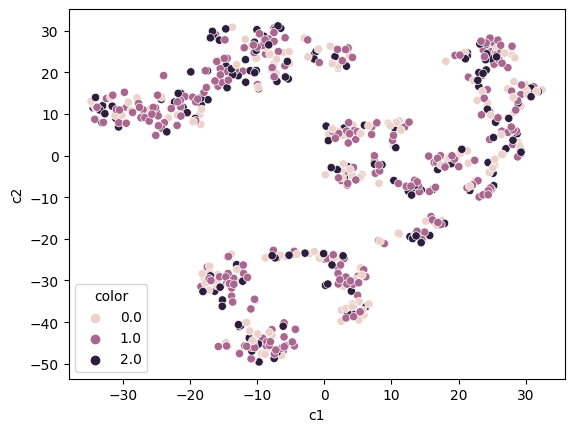

In [ ]:
x_cols = ['age', 'Gender', 'Purchase_Categories',
       'Browsing_Frequency', 'Product_Search_Method','Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency', 'Purchase_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left', 'Improvement_Areas',
       'Review_Reliability', 'Review_Helpfulness', 'Shopping_Satisfaction', 'Rating_Accuracy ',
       'Personalized_Recommendation_Frequency ','Service_Appreciation',]

y_cols = 'Recommendation_Helpfulness'
X = amazonData[x_cols]
Y = amazonData[y_cols]
tsne = TSNE(n_components = 2, random_state = 0, perplexity = 20)
tsne_out = tsne.fit_transform(X)
tsne_out = pd.DataFrame(tsne_out)
tsne_out.columns = ["c1","c2"]
tsne_out["color"] = Y

#Color clustering
sns.scatterplot(tsne_out,x = "c1", y = "c2", hue = "color")
plt.show()

All fields

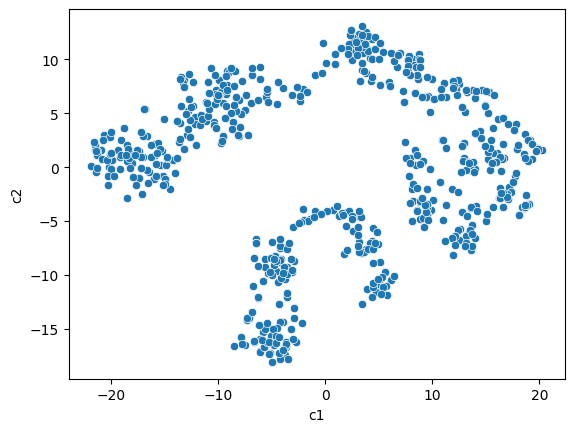

In [ ]:

tsne = TSNE(n_components = 2, random_state = 0, perplexity = 50)
amazonData_filt = amazonData.drop(columns= 'Timestamp')
tsne_out = tsne.fit_transform(amazonData_filt)
tsne_out = pd.DataFrame(tsne_out)
tsne_out.columns = ["c1","c2"]

#Color clustering
sns.scatterplot(tsne_out,x = "c1", y = "c2")
plt.show()


K Means

In [ ]:
kValues = list(range(2,21))
inertias = []
print(kValues)
for i in kValues:
  model = KMeans(i)
  model.fit(amazonData_filt)
  inertias.append(model.inertia_)


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


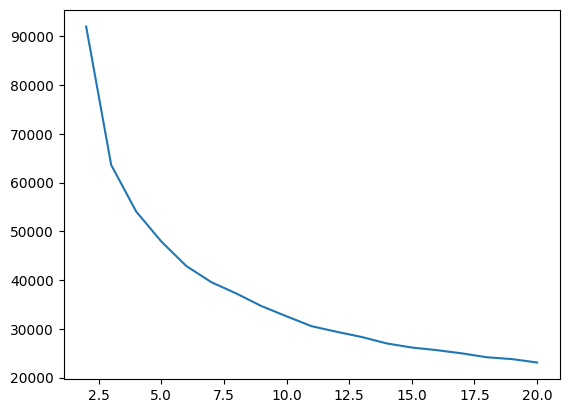

In [ ]:
plt.plot(kValues,inertias)
plt.show()

In [ ]:
model = KMeans(6)
model.fit(amazonData_filt)
cluster_pred = model.predict(amazonData_filt)

In [ ]:
print(cluster_pred)

[3 4 1 3 3 4 4 3 3 3 4 3 3 4 3 1 4 4 3 3 5 4 1 4 3 4 3 3 3 4 1 4 1 4 4 1 3
 3 0 4 1 1 1 4 3 3 3 4 1 4 3 1 3 1 4 3 4 3 0 3 1 3 1 1 3 1 4 3 1 1 3 1 1 1
 1 1 1 1 2 2 5 2 3 1 3 0 3 4 3 1 5 4 5 1 0 0 1 0 3 5 1 4 4 4 3 3 1 4 4 1 1
 4 4 1 3 0 3 4 3 4 1 0 3 0 1 4 4 4 3 3 0 3 0 5 0 1 1 4 4 0 2 0 3 3 2 1 5 5
 4 2 3 3 3 3 5 1 0 0 0 0 0 3 5 4 5 3 3 3 4 3 4 0 2 2 3 5 4 1 4 4 3 3 3 3 1
 4 4 3 4 4 4 4 0 3 4 4 3 4 3 3 0 3 2 1 2 0 1 3 0 0 0 1 1 2 2 5 1 0 3 0 2 0
 4 3 4 1 1 2 1 1 3 4 0 2 3 4 4 0 3 3 0 3 4 4 3 4 4 0 4 3 4 3 1 5 2 5 2 2 0
 5 4 0 3 4 1 4 4 3 0 0 1 3 5 4 0 0 0 4 2 4 0 3 4 2 0 3 3 5 0 3 3 3 4 0 3 4
 0 5 3 5 4 5 1 3 2 0 3 4 4 4 4 1 4 4 1 4 5 2 4 0 3 0 4 3 4 3 2 3 4 2 4 3 4
 0 0 1 0 0 4 4 4 3 1 0 0 0 3 4 4 2 4 3 2 0 2 2 2 4 4 0 1 0 4 0 3 0 0 0 0 2
 3 0 2 0 0 0 3 2 3 0 0 4 3 4 0 5 3 4 5 0 4 5 3 5 0 2 0 1 2 1 3 0 3 3 1 4 0
 1 1 1 1 0 5 3 4 0 3 1 4 3 4 5 3 4 4 0 3 4 1 1 0 2 4 0 0 5 0 0 1 0 1 3 0 4
 1 3 0 4 3 3 1 5 4 0 5 0 2 5 0 3 4 0 5 5 5 2 5 4 4 3 4 5 5 3 5 3 2 3 3 0 0
 5 0 0 5 5 0 2 0 5 4 4 3 

In [ ]:
tsne = TSNE(n_components = 2, random_state = 0, perplexity = 50)
amazonData_filt = amazonData.drop(columns= 'Timestamp')
tsne_out = tsne.fit_transform(amazonData_filt)
tsne_out = pd.DataFrame(tsne_out)
tsne_out.columns = ["c1","c2"]
tsne_out['pred_cluster'] = cluster_pred
# #Color clustering
# sns.scatterplot(tsne_out,x = "c1", y = "c2")
# plt.show()

In [ ]:
tsne_out

In [ ]:
#Color clustering
sns.scatterplot(tsne_out,x = "c1", y = "c2", hue ='pred_cluster')
plt.show()

In [ ]:
amazonData_filt['pred_cluster'] = cluster_pred

In [ ]:
amazonData_filt

In [ ]:
amazonData_filt.groupby('pred_cluster').median()

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Cart_Completion_Frequency')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Service_Appreciation')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Rating_Accuracy ')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Shopping_Satisfaction')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Improvement_Areas')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Review_Reliability')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Review_Helpfulness')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Personalized_Recommendation_Frequency ')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Search_Result_Exploration' )

DBSCAN

In [ ]:
amazonData_filt = amazonData_filt.drop(columns ='pred_cluster')

In [ ]:
eps = [7.25]
min_samples = [13]
for e in eps:
  for m in min_samples:
    model = DBSCAN(eps = e, min_samples = m)
    model.fit(amazonData_filt)
    tsne_out['pred_cluster'] = model.labels_
    sns.scatterplot(tsne_out,x = "c1", y = "c2", hue ='pred_cluster')
    plt.title(f'eps={e}, min_samples = {m}')
    plt.show()
    # print(set(model.labels_),e,m)
    # try:
    #   score = silhouette_score(amazonData_filt, model.labels_)
    #   print(score)
    # except:
    #   pass


In [ ]:
model = DBSCAN(eps=7.25,min_samples=13)
model.fit(amazonData_filt)
print(tsne_out)
tsne_out['pred_cluster'] = model.labels_

In [ ]:
sns.scatterplot(tsne_out,x = "c1", y = "c2", hue ='pred_cluster')
plt.show()

In [ ]:
model = DBSCAN(eps=7.25,min_samples=13)
model.fit(amazonData_filt)
amazonData_filt['pred_cluster'] = model.labels_

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Review_Helpfulness')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y = 'Cart_Completion_Frequency')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y = 'Search_Result_Exploration')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Improvement_Areas')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Service_Appreciation')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Shopping_Satisfaction')

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Rating_Accuracy ')

KModes

In [ ]:
categoricalColumns = [1,2,3,4,5,6,7, 8, 9, 10, 11,12,13, 14, 15, 16, 17, 20, 21]
if "pred_cluster" in amazonData_filt.columns:

  amazonData_filt = amazonData_filt.drop(columns ='pred_cluster' )



In [ ]:
Cost = []
ks = list(range(2,6))
for k in ks:
  model = KPrototypes(n_clusters= k)
  model.fit(amazonData_filt, categorical = categoricalColumns)
  Cost.append(model.cost_)
  print(k)


2
3
4
5


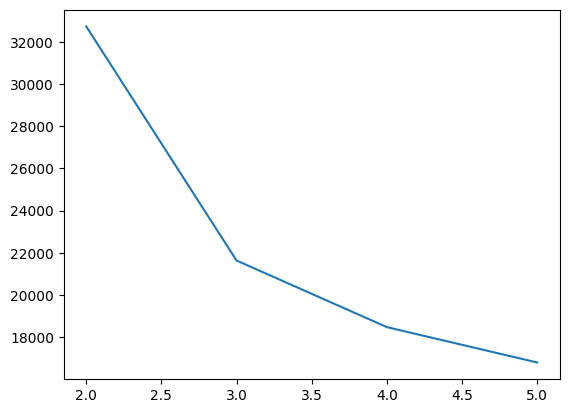

In [ ]:
plt.plot(ks,Cost)

In [ ]:
model = KPrototypes(n_clusters= 3)
model.fit(amazonData_filt, categorical = categoricalColumns)
pred = model.predict(amazonData_filt, categorical = categoricalColumns)
amazonData_filt["pred_cluster"] = pred

<Axes: xlabel='pred_cluster', ylabel='Service_Appreciation'>

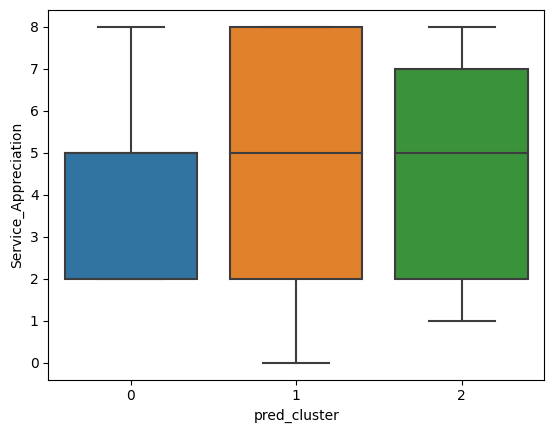

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Service_Appreciation')

<Axes: xlabel='pred_cluster', ylabel='Shopping_Satisfaction'>

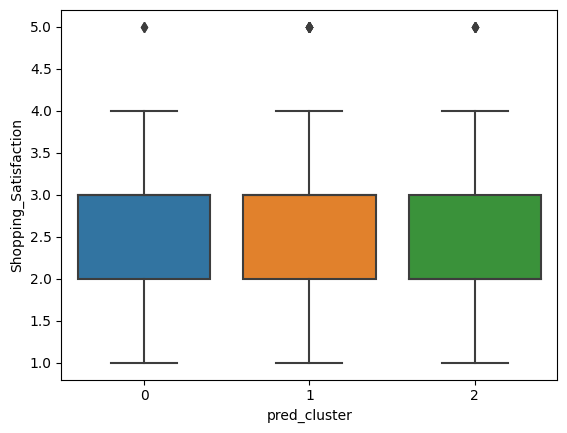

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Shopping_Satisfaction')

<Axes: xlabel='pred_cluster', ylabel='Rating_Accuracy '>

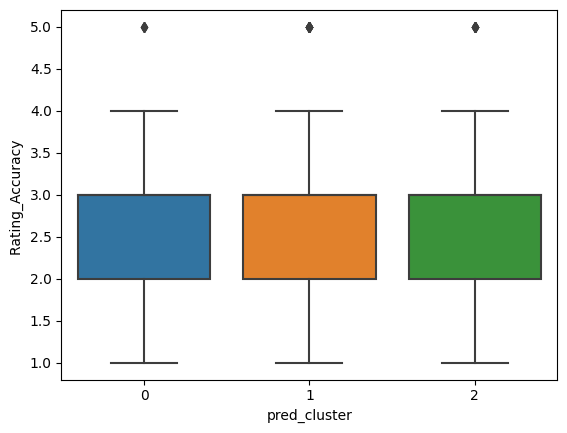

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Rating_Accuracy ')

<Axes: xlabel='pred_cluster', ylabel='Improvement_Areas'>

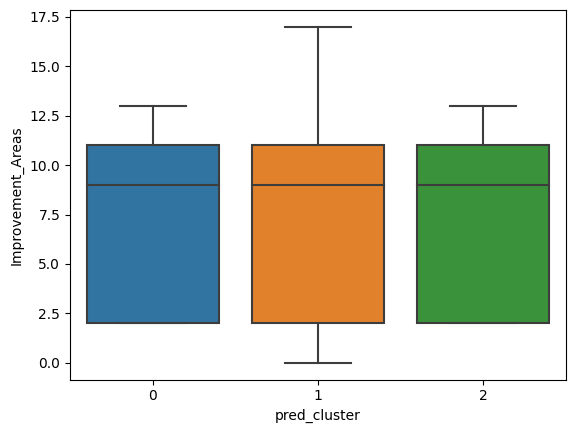

In [ ]:
sns.boxplot(data = amazonData_filt, x = 'pred_cluster', y ='Improvement_Areas')